In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPool1D)
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

from matplotlib import pyplot as plt

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
MAX_FEATURES = 20000
MAXLEN = 100
EMBEDDING_SIZE = 128

KERNEL_SIZE = 5
FILTERS = 64
POOL_SIZE = 4

LSTM_OUTPUT_SIZE = 70
BATCH_SIZE = 30
EPOCHS = 100
PATIENCE = 10

In [4]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_FEATURES)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

25000 train sequences
25000 test sequences


In [5]:
x_train = pad_sequences(x_train, maxlen=MAXLEN)
x_test = pad_sequences(x_test, maxlen=MAXLEN)
print('x_train shape:', x_train.shape)
print('x_test shape', x_test.shape)

x_train shape: (25000, 100)
x_test shape (25000, 100)


In [6]:
model = Sequential([
    Embedding(MAX_FEATURES, EMBEDDING_SIZE, input_length=MAXLEN),
    Dropout(0.25),
    Conv1D(FILTERS, KERNEL_SIZE, padding='valid', activation='relu', strides=1),
    MaxPool1D(pool_size=POOL_SIZE),
    LSTM(LSTM_OUTPUT_SIZE),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_test, y_test),
                    callbacks=[EarlyStopping(patience=PATIENCE, restore_best_weights=True)])

Train on 25000 samples, validate on 25000 samples
Epoch 1/100
25000/25000 [==============================] - 29s 1ms/sample - loss: 0.3920 - accuracy: 0.8167 - val_loss: 0.3262 - val_accuracy: 0.8568
Epoch 2/100
25000/25000 [==============================] - 26s 1ms/sample - loss: 0.1999 - accuracy: 0.9248 - val_loss: 0.3789 - val_accuracy: 0.8467
Epoch 3/100
25000/25000 [==============================] - 27s 1ms/sample - loss: 0.0963 - accuracy: 0.9664 - val_loss: 0.4155 - val_accuracy: 0.8426
Epoch 4/100
25000/25000 [==============================] - 26s 1ms/sample - loss: 0.0434 - accuracy: 0.9867 - val_loss: 0.5299 - val_accuracy: 0.8426
Epoch 5/100
25000/25000 [==============================] - 25s 1ms/sample - loss: 0.0275 - accuracy: 0.9909 - val_loss: 0.6880 - val_accuracy: 0.8356
Epoch 6/100
25000/25000 [==============================] - 26s 1ms/sample - loss: 0.0153 - accuracy: 0.9950 - val_loss: 0.7768 - val_accuracy: 0.8336
Epoch 7/100
25000/25000 [=========================

Text(0.5, 0.98, 'loss: 0.33, accuracy: 85.68%')

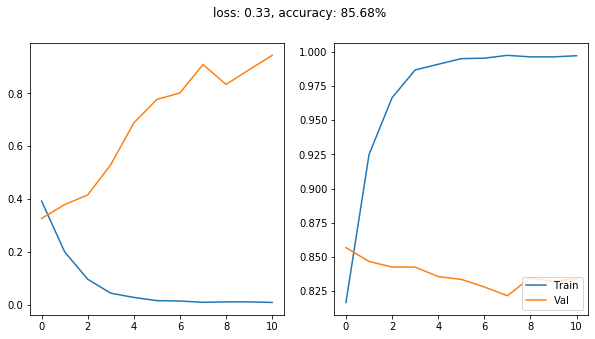

In [10]:
loss, acc = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE, verbose=0)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])
plt.subplot(1,2,2)
plt.plot(history.epoch, history.history['accuracy'], label='Train')
plt.plot(history.epoch, history.history['val_accuracy'], label='Val')
plt.legend(loc=4)
plt.suptitle(f"loss: {loss:.2f}, accuracy: {acc:.2%}")